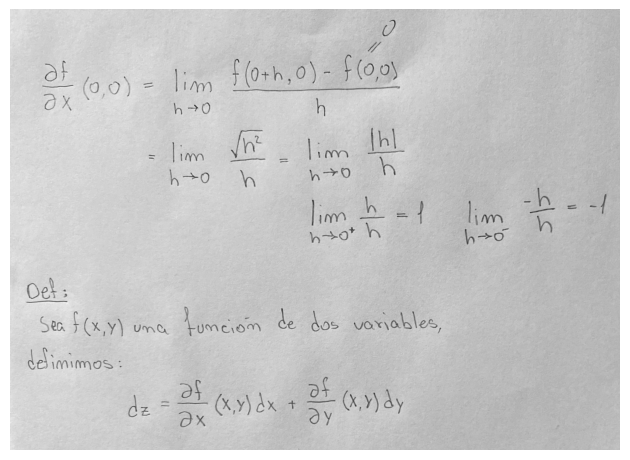

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_image = mpimg.imread('screenshots/imagen9.png')

image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
size = height, width = image.shape
print(image.shape)

(1489, 2060)


In [17]:
print(f'max: {image.max()}')
print(f'min: {image.min()}')

max: 0.9767176484405994
min: 0.19158823877424003


In [18]:
# dividir matriz en sub matrices
def dividir(matrix, n):
    sub_matrices = []
    
    for i in range(0, matrix.shape[0], n):
        for j in range(0, matrix.shape[1], n):
            submatriz = matrix[i:i+n, j:j+n]
            sub_matrices.append(submatriz)
    return sub_matrices

sub_images = dividir(image, 500)   # dividir matriz en sub matrices de dimension 500

In [19]:
# valor más repetido
def mas_repetido(image, value=None, delta=None):   # value: 'min' | 'max'
    minimo = image.min()
    maximo = image.max()
    
    if value == None:
        valores, conteos = np.unique(image, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'min':   # min: mas oscuros
        rango_min = minimo + delta
        rango = image[(image >= minimo) & (image <= rango_min)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'max':   # min: mas claros
        rango_max = maximo - delta
        rango = image[(image <= maximo) & (image >= rango_max)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep

In [20]:
# Detectar si es similar a rep
def rep_to_color(valor, rep, delta):
    if abs(valor - rep) <= delta: return True
    else: return False

---
#### Test 1

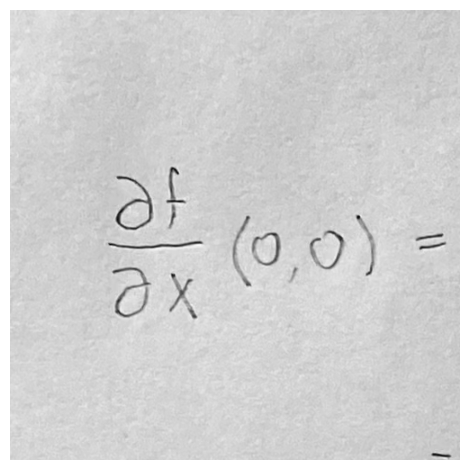

In [21]:
image1 = sub_images[0]
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
size = height, width = image1.shape
print(image1.shape)

(500, 500)


In [23]:
print(f'min: {image1.min()}')
print(f'max: {image1.max()}')
print(f'min_rep: {mas_repetido(image1, "min", 0.1)}')
print(f'max_rep: {mas_repetido(image1, "max", 0.1)}')
print(f'mas_rep: {mas_repetido(image1)}')

min: 0.2896600125342607
max: 0.9719447075486183
min_rep: 0.32495059866607184
max_rep: 0.8738729486882687
mas_rep: 0.8503458912670613


In [24]:
# # cambiar color mas oscuro mas repetido (fondo) a negro
# rep = mas_repetido(image1, 'min', 0.25)
# for i in range(image1.shape[0]):
#     for j in range(image1.shape[1]):
#         if rep_to_color(image1[i, j], rep, 0.25):
#             image1[i, j] = 0
            
# plt.imshow(image1, cmap='gray')
# plt.axis('off')
# plt.tight_layout()
# plt.show()

In [25]:
# # cambiar color mas claro mas repetido (fondo) a blanco
# rep = mas_repetido(image1, 'max', 0.15)
# for i in range(image1.shape[0]):
#     for j in range(image1.shape[1]):
#         if rep_to_color(image1[i, j], rep, 0.15):
#             image1[i, j] = 1
            
# plt.imshow(image1, cmap='gray')
# plt.axis('off')
# plt.tight_layout()
# plt.show()

---
#### Test 2

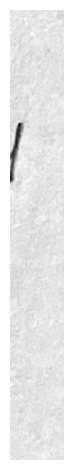

In [26]:
image2 = sub_images[9]
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

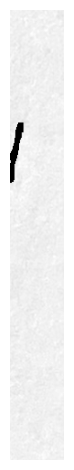

In [27]:
# cambiar color mas oscuro mas repetido (fondo) a negro
rep = mas_repetido(image2, 'min', 0.25)
for i in range(image2.shape[0]):
    for j in range(image2.shape[1]):
        if rep_to_color(image2[i, j], rep, 0.25):
            image2[i, j] = 0
            
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

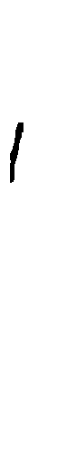

In [28]:
# cambiar color mas claro mas repetido (fondo) a blanco
rep = mas_repetido(image2, 'max', 0.15)
for i in range(image2.shape[0]):
    for j in range(image2.shape[1]):
        if rep_to_color(image2[i, j], rep, 0.15):
            image2[i, j] = 1
            
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()